In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [53]:
df=pd.read_csv('housing.csv')

In [54]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

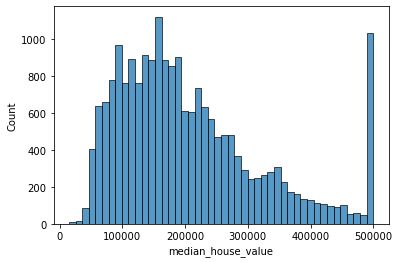

In [55]:
sns.histplot(df.median_house_value)

In [56]:
base=['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income']

In [57]:
df[base]

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672


In [58]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [59]:
df.population.median()

1166.0

In [60]:
n = len(df)

n_val = int(n* 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [61]:
idx=np.arange(n)

In [62]:
np.random.shuffle(idx)

In [63]:
df_train = df.iloc[idx[n_train:]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [64]:
df_train=df_train.reset_index(drop=True)
df_val=df_val.reset_index(drop=True)
df_test=df_test.reset_index(drop=True)

In [65]:
y_train=np.log1p(df_train.median_house_value.values)
y_val=np.log1p(df_val.median_house_value.values)
y_test=np.log1p(df_test.median_house_value.values)

In [66]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [67]:
def prepare_X(df):
    df=df.copy()
    
    df_num=df[base]
    df_num.total_bedrooms=df_num.total_bedrooms.fillna(df_num.total_bedrooms.mean())
    X=df_num.values
    return X

In [69]:
def train_linear_regression_reg(X,y,r=0.001):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    
    XTX=X.T.dot(X)
    XTX=XTX+r*np.eye(XTX.shape[0])
    
    XTX_inv=np.linalg.inv(XTX)
    w_full=XTX_inv.dot(X.T).dot(y)
    return w_full[0],w_full[1:]

In [71]:
def rmse(y,y_pred):
    error = y - y_pred
    se = error **2
    mse = se.mean()
    return np.sqrt(mse)

In [72]:
for r in [0.0,0.0000001,0.0001,0.001,0.1,1,10]:
    
    X_train = prepare_X(df_train)
    w0,w=train_linear_regression_reg(X_train,y_train,r)

    X_val=prepare_X(df_val)
    y_pred=w0+X_val.dot(w)

    score = rmse(y_val,y_pred)
    
    print(r,w0,score)

0.0 -11.720242181921968 0.346374901438963
1e-07 -11.720239860431853 0.3463749016470813
0.0001 -11.717921190815218 0.3463751097616937
0.001 -11.697073551593013 0.34637702546121096
0.1 -9.782506995272389 0.34689399868007165
1 -3.9307346911219594 0.35260727242670975
10 -0.5606451946309958 0.3586343432122407


In [75]:
np.expm1(w0)

-0.42915935830757745

In [76]:
df_full_train=pd.concat([df_train , df_val])
df_full_train.reset_index(drop=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.32,37.93,33.0,296.0,73.0,216.0,63.0,2.6750,NEAR BAY
1,-121.35,38.68,18.0,7923.0,1558.0,3789.0,1473.0,3.5403,INLAND
2,-117.92,33.94,30.0,2506.0,394.0,1255.0,421.0,4.7813,<1H OCEAN
3,-119.85,36.97,13.0,2872.0,477.0,1607.0,481.0,4.4750,INLAND
4,-119.83,36.82,14.0,1087.0,165.0,365.0,176.0,7.2909,INLAND
...,...,...,...,...,...,...,...,...,...
12379,-117.61,33.42,31.0,3959.0,856.0,1919.0,775.0,4.0313,NEAR OCEAN
12380,-119.66,36.35,15.0,1724.0,374.0,947.0,391.0,3.1094,INLAND
12381,-124.17,40.77,30.0,1895.0,366.0,990.0,359.0,2.2227,NEAR OCEAN
12382,-122.24,38.12,42.0,1625.0,255.0,578.0,243.0,4.0114,NEAR BAY


In [77]:
X_full_train=prepare_X(df_full_train)
X_full_train

/Users/binitagirish/Documents/Binita/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


array([[ 3.7930e+01, -1.2232e+02,  3.3000e+01, ...,  2.1600e+02,
         6.3000e+01,  2.6750e+00],
       [ 3.8680e+01, -1.2135e+02,  1.8000e+01, ...,  3.7890e+03,
         1.4730e+03,  3.5403e+00],
       [ 3.3940e+01, -1.1792e+02,  3.0000e+01, ...,  1.2550e+03,
         4.2100e+02,  4.7813e+00],
       ...,
       [ 4.0770e+01, -1.2417e+02,  3.0000e+01, ...,  9.9000e+02,
         3.5900e+02,  2.2227e+00],
       [ 3.8120e+01, -1.2224e+02,  4.2000e+01, ...,  5.7800e+02,
         2.4300e+02,  4.0114e+00],
       [ 3.5370e+01, -1.1896e+02,  4.0000e+01, ...,  1.0260e+03,
         3.3700e+02,  1.3650e+00]])

In [78]:
y_full_train=np.concatenate([y_train,y_val])

In [79]:
w0,w=train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

In [80]:
X_test=prepare_X(df_test)
y_pred=w0+X_test.dot(w)

score = rmse(y_test,y_pred)
score

0.3423104092119009